# Logistic Regression03

Logistic Regression is the special case of linear regression where dependent or output variable is categorical. Logistic in logistic regression comes from the function which is the core of this algorithm. This function is logistic function or sigmoid function . Logistic function can be written as : 

$$f(x) = \frac{1}{1+e^{-x}}$$

![Sigmoid function](images/sigmoid.png)

Logistic regression is the classification algorithm.  We can implement this function in numpy as follows:



In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
#mpl.rcParams['axes.unicode_minus']=False

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


In [10]:
numbers = np.linspace(-20,20,50) #generate a list of numbers
numbers

array([-20.        , -19.18367347, -18.36734694, -17.55102041,
       -16.73469388, -15.91836735, -15.10204082, -14.28571429,
       -13.46938776, -12.65306122, -11.83673469, -11.02040816,
       -10.20408163,  -9.3877551 ,  -8.57142857,  -7.75510204,
        -6.93877551,  -6.12244898,  -5.30612245,  -4.48979592,
        -3.67346939,  -2.85714286,  -2.04081633,  -1.2244898 ,
        -0.40816327,   0.40816327,   1.2244898 ,   2.04081633,
         2.85714286,   3.67346939,   4.48979592,   5.30612245,
         6.12244898,   6.93877551,   7.75510204,   8.57142857,
         9.3877551 ,  10.20408163,  11.02040816,  11.83673469,
        12.65306122,  13.46938776,  14.28571429,  15.10204082,
        15.91836735,  16.73469388,  17.55102041,  18.36734694,
        19.18367347,  20.        ])

In [11]:
#we will pass each number through sigmoid function
results = sigmoid(numbers)
results[:20]  #print few numbers

array([2.06115362e-09, 4.66268920e-09, 1.05478167e-08, 2.38610019e-08,
       5.39777490e-08, 1.22107080e-07, 2.76227484e-07, 6.24874560e-07,
       1.41357420e-06, 3.19774584e-06, 7.23382998e-06, 1.63640365e-05,
       3.70175420e-05, 8.37362281e-05, 1.89405944e-04, 4.28366894e-04,
       9.68517025e-04, 2.18827951e-03, 4.93663522e-03, 1.10983776e-02])

As you can see, all numbers are squashed between [0,1]

Now, we will implement logistic regression using sklearn.

## 1 - Load the dataset

(1797, 64)


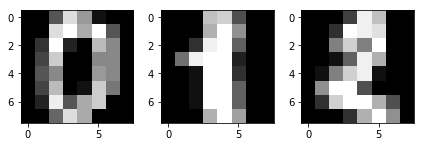

In [8]:
#this time we will use digit dataset.
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
X = digits.data  #input
y = digits.target #output
print(digits.data.shape)  #1797 samples * 64 (8*8)pixels
#input is an image and we would like to train a model which can predict the digit that image contains
#each image is of 8 * 8 pixels

#plot few digits  ## dont worry if u dont understand it
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(231)
ax1.imshow(digits.images[0])

ax2 = fig.add_subplot(232)
ax2.imshow(digits.images[1])

ax3 = fig.add_subplot(233)
ax3.imshow(digits.images[2])

plt.tight_layout()
plt.show()

# 3 - Train a model

Since we dont need to preprocess our dataset, we will directly move to third step.

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
#train a model
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4 - Test a model

In [17]:
#sklearn provides several ways to test a classifier
from sklearn.metrics import accuracy_score
accuracy_score(y, log_reg.predict(X))

0.99332220367278801

In [18]:
#another way
log_reg.score( X, y)

0.99332220367278801

Please recall that its not a good thing to test a model on training dataset. As you can see, we are getting almost 100% accuracy and the reason is we are testing a model on the dataset on which we trained it. Its like you got examples in your test paper same as you practiced during the lecture. So, deifnitely you will get full marks.

In [19]:
#confusion matrix is a table that can be used to evaluate the performance of a classifier
#each row shows actual values and column values shows predicted values
from sklearn.metrics import confusion_matrix
confusion_matrix(y, log_reg.predict(X))

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 179,   0,   1,   0,   0,   0,   0,   2,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   5,   0,   1,   0,   0,   0,   0, 168,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   2, 177]])

Confusion matrix is a table that can be used to evaluate the performance of a classifier. Each row shows actual values and column values shows predicted values. For example, image with digit 9 comes 180 times but our model predicted 177 times.

## Deploy a model

In [20]:
#we can use predict method to predict the class
print("Predicted : " , log_reg.predict(digits.data[1].reshape(1,-1)))
print("Actual : ", digits.target[1])

Predicted :  [1]
Actual :  1


In [21]:
#we can also predict the probability of each class
proba = log_reg.predict_proba(digits.data[1].reshape(1,-1)) # second column has the highest probability
print(proba)
np.argmax(proba) #please note index starts with 0

[[  4.75045461e-18   9.99447460e-01   7.00809699e-10   3.72475330e-09
    2.15616661e-06   1.35167550e-09   5.71303497e-10   1.95595337e-13
    5.50377100e-04   5.64607392e-10]]


1

In practice,we divide our dataset into two parts-training and testing part. Lets implement it.

In [22]:
from sklearn.datasets import load_iris #https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
iris.data.shape 

(150, 4)

In [23]:
#split the dataset into two parts
from sklearn.model_selection import train_test_split
#split dataset into 70-30
X_train, X_test, y_train , y_test = train_test_split(iris.data, iris.target, test_size= 0.3, random_state=42)
#randomstate - to make sure each time we run this code it gives same results

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [25]:
#train on training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#test on test data
model.score(X_test, y_test)


0.97777777777777775

# Overfitting

In theory part, I explained what is overfitting and how it might affect our model so badly. Next, we will implement various methods such as regularizarion and cross-validation to prevent overfitting.

# Regularization

By default, scikit-learn uses l2 regularization with C=1. Please note, C is the inverse of regularization strength. We can tweak some parameters to play around.

In [27]:
model = LogisticRegression(penalty="l2", C=1) #default configuration
model.fit(X_train, y_train)
model.score(X_test, y_test) #note, we got same accuracy

0.97777777777777775

In [28]:
#let us use l1 regularization
model = LogisticRegression(penalty="l1", C=1)
model.fit(X_train, y_train)
model.score(X_test, y_test) #whoa! we got 100% accuracy

1.0

In [29]:
model = LogisticRegression(penalty="l2", C=0.23)
model.fit(X_train, y_train)
model.score(X_test, y_test) 

#you have to consider various values for this type of parameters (hyperparameters) to find the best one
# we can do this with GridCV, RandomCV- This is beyond the scope of this lab session

0.91111111111111109

# Cross-validation

In [30]:
#we discussed about k-fold cross validation. In which we divide whole dataset into k parts and each time we hold out
#one part and train on k-1 parts

#we'll use boston housing dataset
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5) #k=10

costs = []
for train_index,test_index in kfold.split(data.data):
    X_train, y_train = data.data[train_index], data.target[train_index]
    X_test, y_test = data.data[test_index], data.target[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    costs.append(mean_squared_error(y_test, model.predict(X_test)))


In [31]:
np.mean(costs)

37.222843637138403

In [32]:
#10 fold cross-validation
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
digits = load_digits()


model = LogisticRegression()
scores = cross_val_score(model,digits.data, digits.target, cv=10, scoring='accuracy' )
scores.mean()

0.93102983468390121

For classification tasks, it is recommended to use variant of KFold- <b> StratifiedFold</b> which preserves the percentage of samples for each class.

In [33]:
from sklearn.model_selection import StratifiedKFold
digits = load_digits()
skfold = StratifiedKFold(n_splits= 10)
costs = []
for train_index,test_index in skfold.split(digits.data, digits.target):
    X_train, y_train = digits.data[train_index], digits.target[train_index]
    X_test, y_test = digits.data[test_index], digits.target[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    costs.append(model.score(X_test, y_test))

In [34]:
np.mean(costs)

0.93102983468390121